# CNN

## Learning a Pattern
In this example, we will see how we can create a simple CNN that *learns to recognize an arbitrary pattern*.

Then we will see if such a network can learn also to repair a broken pattern.

Finally, we will see some applications of CNN to genomic medicine.

## What we will be using
We will be using the very same tools as the [MLP lesson](https://github.com/LucaCappelletti94/NN-master-course/blob/master/MLP.ipynb).

In [1]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
from keras_tqdm import TQDMNotebookCallback as ktqdm
from matplotlib.colors import cnames
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Creating the dataset
We will create the pattern's dataset as in the MLP lesson, by creating an *unknown* function that describes the signal of the pattern.

In [2]:
def black_box(x:np.ndarray)->np.ndarray:
    return np.round((3*np.sin(x))**2).astype(int)

### What does our signal look like?
Keeping in mind that the signal is actually unknown, to help understanding the data we can plot the `black_box` function:

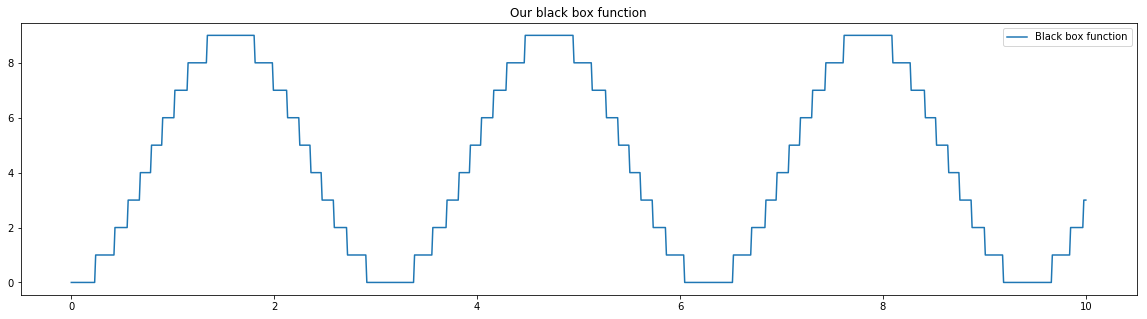

In [3]:
def plot_black_box():
    plt.figure(figsize=(20, 5))
    x = np.linspace(0,10, num=1000,endpoint=True)
    y = black_box(x)
    plt.plot(x,y, label='Black box function')
    
plot_black_box()
plt.title("Our black box function")
plt.legend()
plt.show()

## Creating the pattern
Now we can convert the signal into a repeating pattern:

In [4]:
def pattern(window:int, MAX:int=10):
    return 3+black_box(np.linspace(MAX*(window-1), MAX*window, num=50))

In [5]:
def patterns(N:int):
    return np.array([
        pattern(i) for i in np.random.randint(10000, size=N)
    ])

### Visualizing the pattern
We can now finally proceed to visualize what our pattern looks like:

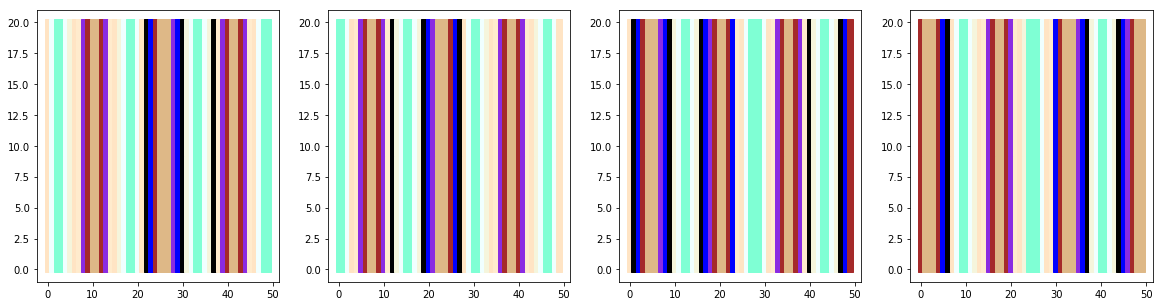

In [7]:
colors = list(cnames)

def get_color(i:int):
    return colors[i]

def plot_pattern(pattern, ax=plt):
    for i, c in enumerate(pattern):
        for j in np.linspace(0,20):
            ax.plot(i, j, "s", color=get_color(c))

_, axes = plt.subplots(1, 4, figsize=(20,5))
for i in tqdm(range(4)):
    plot_pattern(pattern(i), axes[i])
plt.show()